In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
emb_file = "../data/embeddings/graph_embeddings_gcb+sage.npz"

data = np.load(emb_file, allow_pickle=True)
embeddings = data["embeddings"]        # shape (N, D)
labels = data["labels"] if "labels" in data else None

print("Embeddings shape:", embeddings.shape)
if labels is not None:
    print("Labels shape:", labels.shape)

Embeddings shape: (35610, 128)
Labels shape: (35610,)


### PCA (2D)

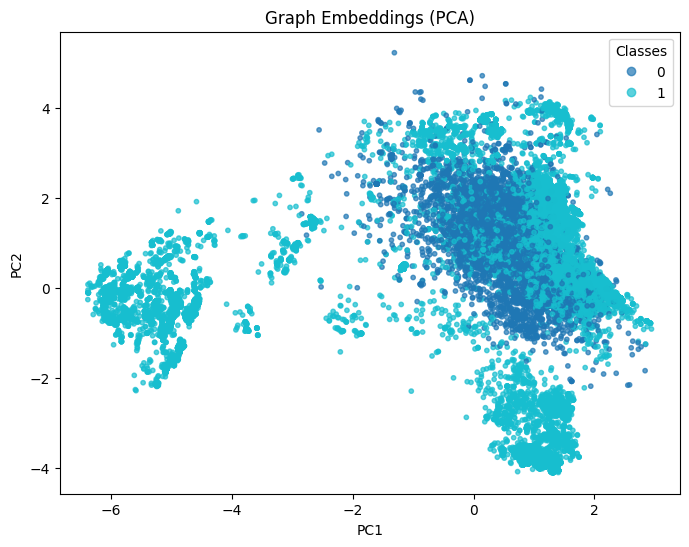

In [18]:
pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
if labels is not None:
    scatter = plt.scatter(emb_pca[:,0], emb_pca[:,1], c=labels, cmap="tab10", s=10, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes")
else:
    plt.scatter(emb_pca[:,0], emb_pca[:,1], s=10, alpha=0.7)

plt.title("Graph Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### t-SNE (2D)

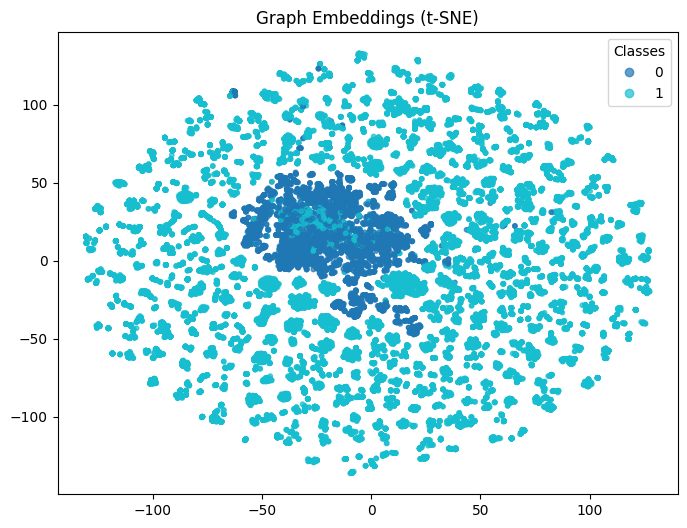

In [19]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
emb_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(8,6))
if labels is not None:
    scatter = plt.scatter(emb_tsne[:,0], emb_tsne[:,1], c=labels, cmap="tab10", s=10, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes")
else:
    plt.scatter(emb_tsne[:,0], emb_tsne[:,1], s=10, alpha=0.7)

plt.title("Graph Embeddings (t-SNE)")
plt.show()

### UMAP (2D)

/opt/miniconda3/envs/vulngraph/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/miniconda3/envs/vulngraph/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:453: UserWarning:

Exited at iteration 2000 with accuracies 
[4.86727378e-15 1.14492710e-06 7.24042493e-06 1.36255696e-05]
not reaching the requested tolerance 2.950429916381836e-06.
Use iteration 723 instead with accuracy 
1.4602945909419793e-06.


/opt/miniconda3/envs/vulngraph/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:453: UserWarning:

Exited postprocessing with accuracies 
[2.13929887e-15 5.66964517e-07 2.20031008e-06 3.07390861e-06]
not reaching the requested tolerance 2.950429916381836e-06.



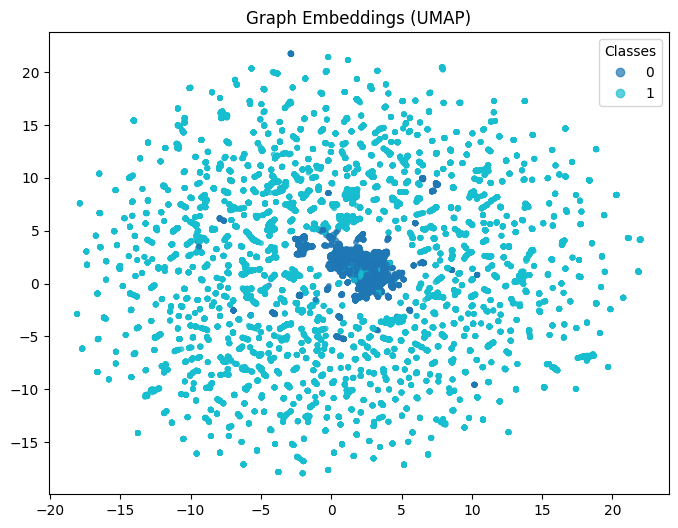

In [20]:
reducer = umap.UMAP(random_state=42)
emb_umap = reducer.fit_transform(embeddings)

plt.figure(figsize=(8,6))
if labels is not None:
    scatter = plt.scatter(emb_umap[:,0], emb_umap[:,1], c=labels, cmap="tab10", s=10, alpha=0.7)
    plt.legend(*scatter.legend_elements(), title="Classes")
else:
    plt.scatter(emb_umap[:,0], emb_umap[:,1], s=10, alpha=0.7)

plt.title("Graph Embeddings (UMAP)")
plt.show()

### PCA (3D)

In [21]:
pca3 = PCA(n_components=3)
emb_pca3 = pca3.fit_transform(embeddings)

fig = px.scatter_3d(
    x=emb_pca3[:,0], y=emb_pca3[:,1], z=emb_pca3[:,2],
    color=labels if labels is not None else None,
    title="Graph Embeddings (PCA - 3D)",
    labels={"x": "PC1", "y": "PC2", "z": "PC3"},
    opacity=0.7
)
fig.show()

### t-SNE (3D)

In [22]:
tsne3d = TSNE(n_components=3, perplexity=min(30, len(embeddings)-1), random_state=42)
emb_tsne3d = tsne3d.fit_transform(embeddings)

fig = px.scatter_3d(
    x=emb_tsne3d[:,0], y=emb_tsne3d[:,1], z=emb_tsne3d[:,2],

    color=labels if labels is not None else None,
    
    title="Graph Embeddings (t-SNE - 3D)",
    labels={"x": "t-SNE1", "y": "t-SNE2", "z": "t-SNE3"},
    opacity=0.7
)
fig.show()